**Imports**

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import os
import glob
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/ozon.csv'
file = pd.read_csv(file_path)
df = pd.DataFrame(file)

**Part 1:**

Qustion 1:

در ابتدا در X تمامی ستون‌ها به جز ستون آخر را می‌ریزیم.
و بعد آن در y ستون آخر را می‌ریزیم.
پس از آن داده‌ها را به صورت رندوم تقسیم می‌کنیم.

پس از آن مدل را تعریف کرده و ترین می‌کنیم و خروجی تابع را به ازای تمامی دو مجموعه ترین و تست چک می‌کنیم که چقدر خطا دارد.

In [34]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rss = mean_squared_error(y_train, y_train_pred)
test_rss = mean_squared_error(y_test, y_test_pred)

print("Train RSS:", train_rss)
print("Test RSS:", test_rss)

Train RSS: 302.7571139913385
Test RSS: 961.9469806917717


Question 2:

در فور، هربار به ازای هر مقدار واریانس به داده لرن خود نویز را اضافه میکنیم.

سپس لرن میکنیم و بعد از آن اختلاف آن را با داده حقیقی اندازه میگیریم.

همانطور که میبینیم، افزایش واریانس منجر میشود که خطا بسیار بالا و پایین برود.

در اینجا ما تنها واریانس را تنها به داده‌های لرن اضافه کردیم.

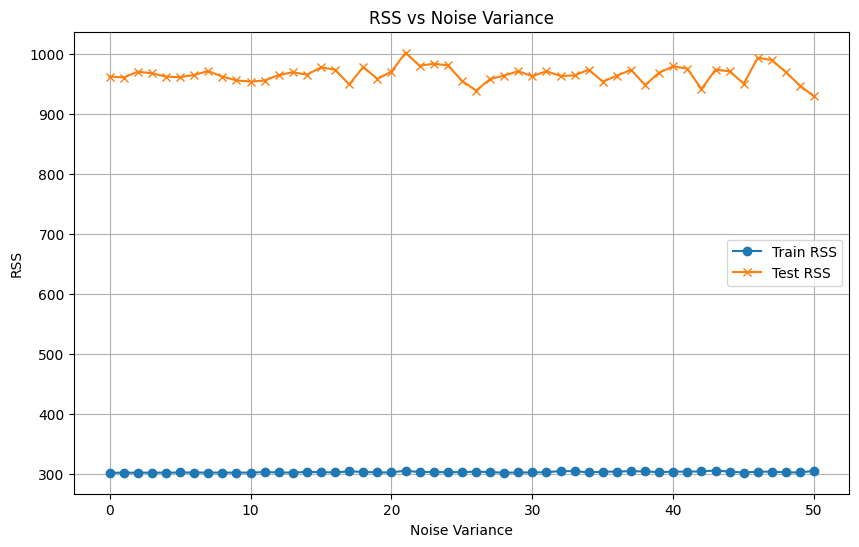

In [35]:
train_errors = []
test_errors = []
variances = np.array(range(0,51))

for var in variances:
  noise = np.random.normal(0, np.sqrt(var), y_train.shape)
  y_train_noisy = y_train + noise

  model = LinearRegression()
  model.fit(X_train, y_train_noisy)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_rss = mean_squared_error(y_train, y_train_pred)
  test_rss = mean_squared_error(y_test, y_test_pred)

  train_errors.append(train_rss)
  test_errors.append(test_rss)

plt.figure(figsize=(10, 6))
plt.plot(variances, train_errors, label="Train RSS", marker='o')
plt.plot(variances, test_errors, label="Test RSS", marker='x')
plt.title('RSS vs Noise Variance')
plt.xlabel('Noise Variance')
plt.ylabel('RSS')
plt.legend()
plt.grid(True)
plt.show()

در اینجا ما به کل داده‌های اوزون واریانس را اضافه کردیم.

در اینجا هم به نتایج مشابهی میرسیم که با افزایش عدد واریانس در خروجی تست یادگیری ما خطا میتواند بسیار بالا پایین برود.

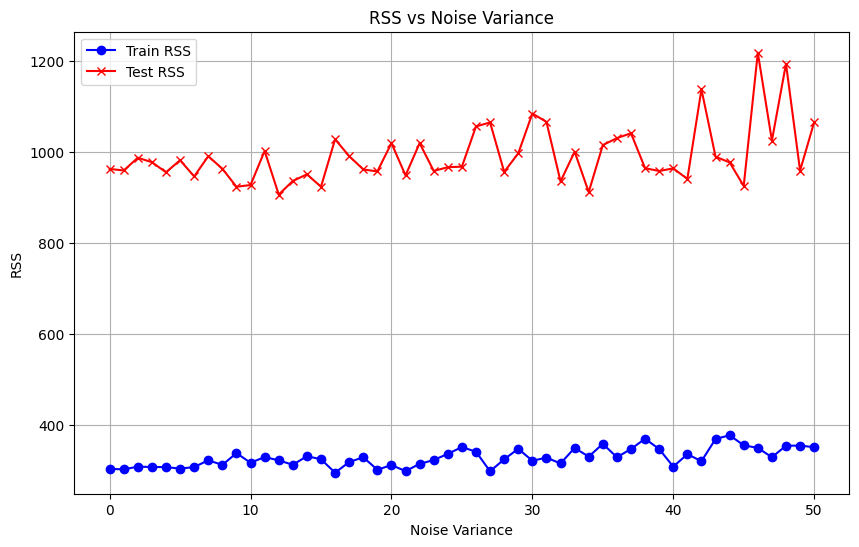

In [36]:
train_rss_list = []
test_rss_list = []

for noise_variance in range(51):
  noise = np.random.normal(0, np.sqrt(noise_variance), size=len(y_test))
  y_noisy_test = y_test + noise
  noise = np.random.normal(0, np.sqrt(noise_variance), size=len(y_train))
  y_noisy_train = y_train + noise

  model = LinearRegression()
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_rss = mean_squared_error(y_noisy_train, y_train_pred)
  test_rss = mean_squared_error(y_noisy_test, y_test_pred)

  train_rss_list.append(train_rss)
  test_rss_list.append(test_rss)

plt.figure(figsize=(10, 6))
plt.plot(range(51), train_rss_list, label='Train RSS', color='blue', marker='o')
plt.plot(range(51), test_rss_list, label='Test RSS', color='red', marker='x')
plt.title('RSS vs Noise Variance')
plt.xlabel('Noise Variance')
plt.ylabel('RSS')
plt.legend()
plt.grid(True)
plt.show()

Question 3:

در اینجا ابتدا داده X^2 را ساختیم و به آن اضافه کردیم.

پس از آن مانند سوال اول یادگیری کردیم و نتایج را نشان دادیم.

کلا مقداری به میزان خطاها کمک میکند تا کاسته شود.

In [49]:
X = df.iloc[:, :-1]
X_squared = X.copy()
for col in X.columns:
    X_squared[col + '_squared'] = X[col] ** 2 # هر عضو را به توان 2 میرسانیم
X_extended = pd.concat([X, X_squared], axis=1)
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_extended, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rss = mean_squared_error(y_train, y_train_pred)
test_rss = mean_squared_error(y_test, y_test_pred)

print("Train RSS:", train_rss)
print("Test RSS:", test_rss)

Train RSS: 258.72698161396346
Test RSS: 562.5030086071848


**Part 2:**

Qusetion 1:

در ابتدا و برای لود عکس‌ها یک تابع نوشتم:

1) ابتدا نام فولدرها را میگیریم

2) پس از آن نامها را سورت میکنیم و عکس‌های داخل هر کدام را لود میکنیم

3) سپس به هر کدام یک عدد نسبت میدهیم (همان لیبل‌ها)

پس از آن عکسها را بخش بندی میکنیم و داده‌ها را بر روی آنها لرن میکنیم.

این کار امکان پذیر است اما بسیار طول میکشد.(بیش از 4 دقیقه)

In [62]:
# Function to load images and assign labels
def load_images_and_labels(data_dir):
    image_data = []
    labels = []

    # Loop through each video folder (each video is assumed to have its own folder)
    for video_folder in os.listdir(data_dir):
        video_path = os.path.join(data_dir, video_folder)

        if os.path.isdir(video_path):
            # List all frame files in the video folder
            frame_files = sorted(os.listdir(video_path))  # Assuming frames are sorted in increasing surprise
            num_frames = len(frame_files)

            for i, frame_file in enumerate(frame_files):
                # Load the frame as a grayscale image (for simplicity)
                frame_path = os.path.join(video_path, frame_file)
                image = Image.open(frame_path).convert('L')  # 'L' mode is for grayscale

                # Flatten the image into a 1D array of pixel values
                image_data.append(np.array(image).flatten())

                # Assign the label (degree of surprise) linearly from 0 to 1
                label = i / (num_frames - 1)
                labels.append(label)

    return np.array(image_data), np.array(labels)

In [63]:
# Path to the dataset directory (replace with the correct path)
data_dir = '/content/drive/My Drive/videos/surprise videos'

# Load the images and labels
X, y = load_images_and_labels(data_dir)

# Split the data: 60% for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the test set and evaluate the model
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on test set: {mse}")

Mean Squared Error on test set: 0.006181988457397473


Question 2:

در اینجا همان کار قبل را کردیم اما با این تفاوت که در ابتدا یک ماسک مربعی به اندازه 800 در 800 انداختم و پس از آن کاهش رزولوشن کردم.

خیلی دقت کار ما کاهش نیافت که این خوب است. زیرا کمک میکند که سریعتر کارهای لرن و پردازش را انجام دهیم بدون اینکه دقت کاهش یابد.

In [59]:
# Function to crop the center, downscale by merging 4x4 pixels, and load images and assign labels
def load_images_and_labels_crop(data_dir):
    image_data = []
    labels = []

    for video_folder in os.listdir(data_dir):
        video_path = os.path.join(data_dir, video_folder)

        if os.path.isdir(video_path):
            frame_files = sorted(os.listdir(video_path))
            num_frames = len(frame_files)

            for i, frame_file in enumerate(frame_files):
                frame_path = os.path.join(video_path, frame_file)
                image = Image.open(frame_path).convert('L')

                # Step 1: Crop the center 800x800 region
                width, height = image.size  # (1200, 900)
                left = (width - 800) // 2
                top = (height - 800) // 2
                right = left + 800
                bottom = top + 800
                image_cropped = image.crop((left, top, right, bottom))  # Crop to 800x800

                # Step 2: Downscale the image by merging 4x4 pixels into 1 (resulting in 200x200 image)
                image_downscaled = image_cropped.resize((200, 200), resample=Image.BOX)

                # Flatten the image into a 1D array of pixel values
                image_data.append(np.array(image_downscaled).flatten())

                # Step 3: Assign the label (degree of surprise) linearly from 0 to 1
                label = i / (num_frames - 1)
                labels.append(label)

    return np.array(image_data), np.array(labels)

In [65]:
X1, y1 = load_images_and_labels_crop(data_dir)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=42)

regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

y_pred = regressor.predict(X1_test)
mse = mean_squared_error(y1_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

Mean Squared Error on test set: 0.006419151539636112


Question 3:

این کد برای استفاده از PCA در کاهش تعداد بعد در داده‌های 200 * 200 است.

برای مقایسه، همین کار را برای داده‌های اصلی در بخش بعدی هم انجام دادیم.

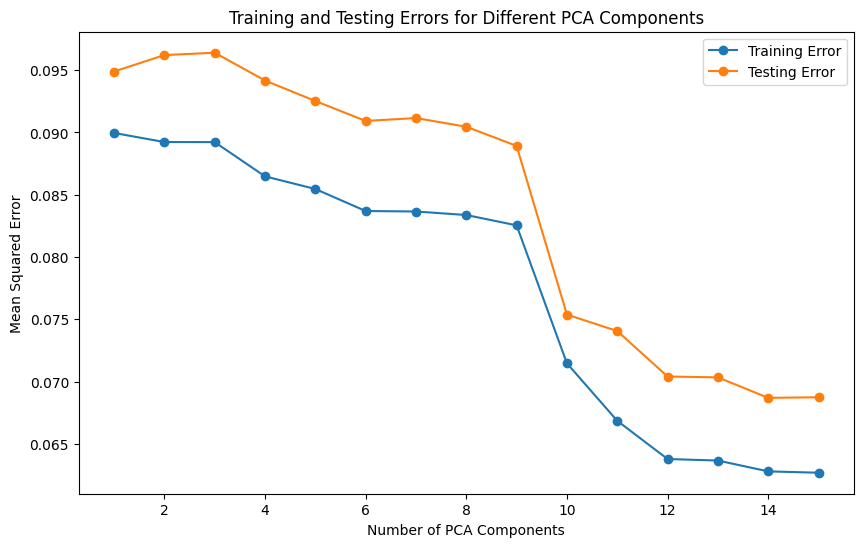

Best Test MSE: 0.06870075875989015 with 14 PCA components


In [66]:
pca_components = range(1, 16)
train_errors = []
test_errors = []

# Loop over the PCA component range
for n_components in pca_components:
    # Initialize PCA and fit on training data
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X1_train)
    X_test_pca = pca.transform(X1_test)

    # Train linear regression on reduced dimensions
    regressor = LinearRegression()
    regressor.fit(X_train_pca, y1_train)

    # Predict on both training and test sets
    y_train_pred = regressor.predict(X_train_pca)
    y_test_pred = regressor.predict(X_test_pca)

    # Calculate mean squared error for both sets
    train_mse = mean_squared_error(y1_train, y_train_pred)
    test_mse = mean_squared_error(y1_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot training and test errors for different numbers of PCA components
plt.figure(figsize=(10, 6))
plt.plot(pca_components, train_errors, label='Training Error', marker='o')
plt.plot(pca_components, test_errors, label='Testing Error', marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors for Different PCA Components')
plt.legend()
plt.show()

# Find the best test error and corresponding number of PCA components
best_test_error = min(test_errors)
best_num_features = pca_components[test_errors.index(best_test_error)]
print(f"Best Test MSE: {best_test_error} with {best_num_features} PCA components")

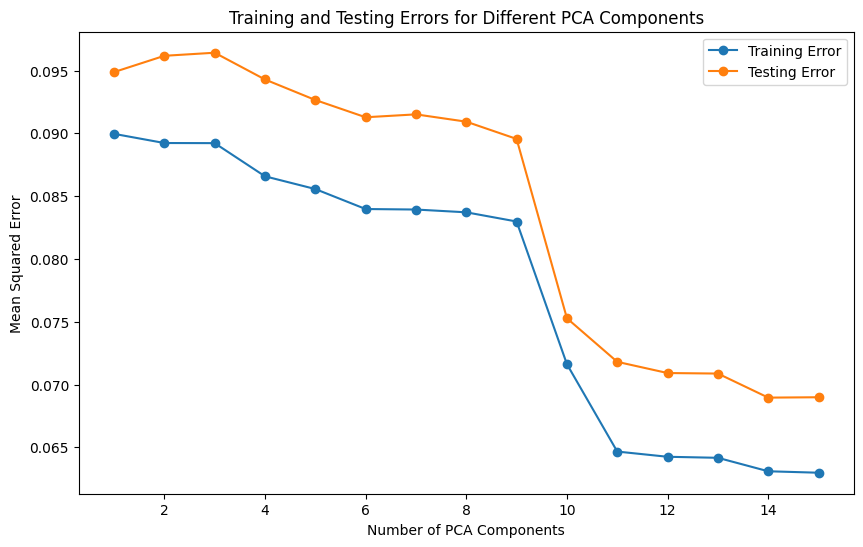

Best Test MSE: 0.06895696368957965 with 14 PCA components


In [64]:
pca_components = range(1, 16)
train_errors = []
test_errors = []

for n_components in pca_components:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    regressor = LinearRegression()
    regressor.fit(X_train_pca, y_train)

    y_train_pred = regressor.predict(X_train_pca)
    y_test_pred = regressor.predict(X_test_pca)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

plt.figure(figsize=(10, 6))
plt.plot(pca_components, train_errors, label='Training Error', marker='o')
plt.plot(pca_components, test_errors, label='Testing Error', marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors for Different PCA Components')
plt.legend()
plt.show()

best_test_error = min(test_errors)
best_num_features = pca_components[test_errors.index(best_test_error)]
print(f"Best Test MSE: {best_test_error} with {best_num_features} PCA components")

همان طور که می‌بینیم، در کل شکل آنها در افزایش دقت شبیه هم هستند.

فقط با این تفاوت که در حالت اول(عکس کراپ شده)، بسیار سیستم سریعتر ران شد.

اما دقت حالت دیگر اندکی بهتر است که این تفاوت هم بسیار زیاد نیست.